In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'Data/train'
valid_path = 'Data/test'

In [3]:
VGG19= VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 12s 0us/step


In [4]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [5]:
for layer in VGG19.layers:
    layer.trainable = False

In [6]:
folders = glob('Data/train/*')

In [8]:
folders

['Data/train\\NORMAL', 'Data/train\\PNEUMONIA']

In [9]:
x = Flatten()(VGG19.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

In [13]:
model = Model(inputs=VGG19.input, outputs=prediction)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [24]:
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 100 images belonging to 2 classes.


In [25]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 60 images belonging to 2 classes.


In [26]:
len(training_set)

13

In [27]:
len(test_set)

8

In [28]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
13/13 [==============================] - 247s 19s/step - loss: 1.5121 - accuracy: 0.6300 - val_loss: 0.4915 - val_accuracy: 0.7833
Epoch 2/10
13/13 [==============================] - 242s 19s/step - loss: 0.3581 - accuracy: 0.8300 - val_loss: 0.5818 - val_accuracy: 0.7833
Epoch 3/10
13/13 [==============================] - 242s 19s/step - loss: 0.5225 - accuracy: 0.8600 - val_loss: 1.1354 - val_accuracy: 0.6000
Epoch 4/10
13/13 [==============================] - 243s 19s/step - loss: 0.5471 - accuracy: 0.8500 - val_loss: 0.4305 - val_accuracy: 0.8833
Epoch 5/10
13/13 [==============================] - 241s 19s/step - loss: 0.2101 - accuracy: 0.9100 - val_loss: 0.5410 - val_accuracy: 0.7167
Epoch 6/10
13/13 [==============================] - 241s 19s/step - loss: 0.1823 - accuracy: 0.9700 - val_loss: 0.5666 - val_accuracy: 0.7167
Epoch 7/10
13/13 [==============================] - 242s 19s/step - loss: 0.1346 - accuracy: 0.9500 - val_loss: 0.3360 - val_accuracy: 0.8333
Epoch 

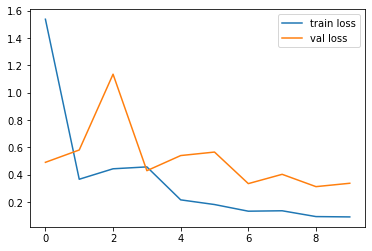

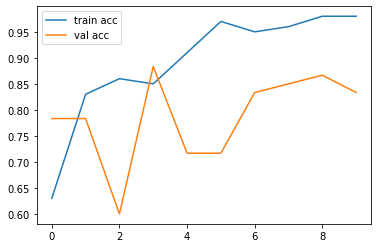

<Figure size 432x288 with 0 Axes>

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
model.save('model_vgg19_Dkt.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg19_Dkt.h5')

In [ ]:
img=image.load_img('C:/AI/ML-Project/Maleria_Detection/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Normal")
else:
    print("Pneumonia")